In [1]:
!pip install vanna[mysql]


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import vanna
from vanna.remote import VannaDefault

In [3]:
api_key = 'e8df9ecb185a43ff84f052c47c2d360e'

vanna_model_name = 'angeline'
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [4]:
vn.connect_to_mysql(host='localhost', dbname='test_db', user='root', password='2757', port=3306)

In [5]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_SCHEMA = 'test_db' AND TABLE_NAME = 'employees'")

In [6]:
plan = vn.get_training_plan_generic(df_information_schema)
plan

Train on Information Schema: def.test_db employees

In [8]:
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS employees (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT,
        department VARCHAR(100),
        salary DECIMAL(10, 2)
    )
""")

Adding ddl: 
    CREATE TABLE IF NOT EXISTS employees (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT,
        department VARCHAR(100),
        salary DECIMAL(10, 2)
    )



'5365269-ddl'

In [9]:
vn.train(documentation="The 'employees' table in the 'testdb' database contains information about employees, including their ID, name, age, department, and salary.")

Adding documentation....


'3317885-doc'

In [10]:
vn.train(sql="SELECT id, name, age, department, salary FROM employees WHERE department = 'Sales'")

Question generated with sql: What are the details of employees working in the Sales department? 
Adding SQL...


'e59e37a2d499f60743a4dc63c9ea10c5-sql'

In [11]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,1035756-sql,sql,What are the details of all employees?,SELECT * FROM employees;
1,2223955-ddl,ddl,None,\n CREATE TABLE IF NOT EXISTS employees (\n...
2,1035773-sql,sql,"How many employees earn more than $60,000 in e...","SELECT department, COUNT(*) FROM employees WHE..."
3,1036260-sql,sql,How many employees were hired in each departme...,"SELECT department, YEAR(created_at) AS year, C..."
4,1035805-sql,sql,What is the minimum and maximum salary in each...,"SELECT department, MIN(salary) AS min_salary, ..."
...,...,...,...,...
86,1035788-sql,sql,Which departments have more than five employees?,"SELECT department, COUNT(*) FROM employees GRO..."
87,3265704-doc,documentation,None,The 'employees' table in the 'testdb' database...
88,1035772-sql,sql,What are the names and salaries of employees e...,"SELECT name, salary FROM employees WHERE salar..."
89,1035798-sql,sql,What is the lowest salary in the organization?,SELECT MIN(salary) FROM employees;


SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE IF NOT EXISTS employees (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT,\n        department VARCHAR(100),\n        salary DECIMAL(10, 2)\n    )\n\n\n\

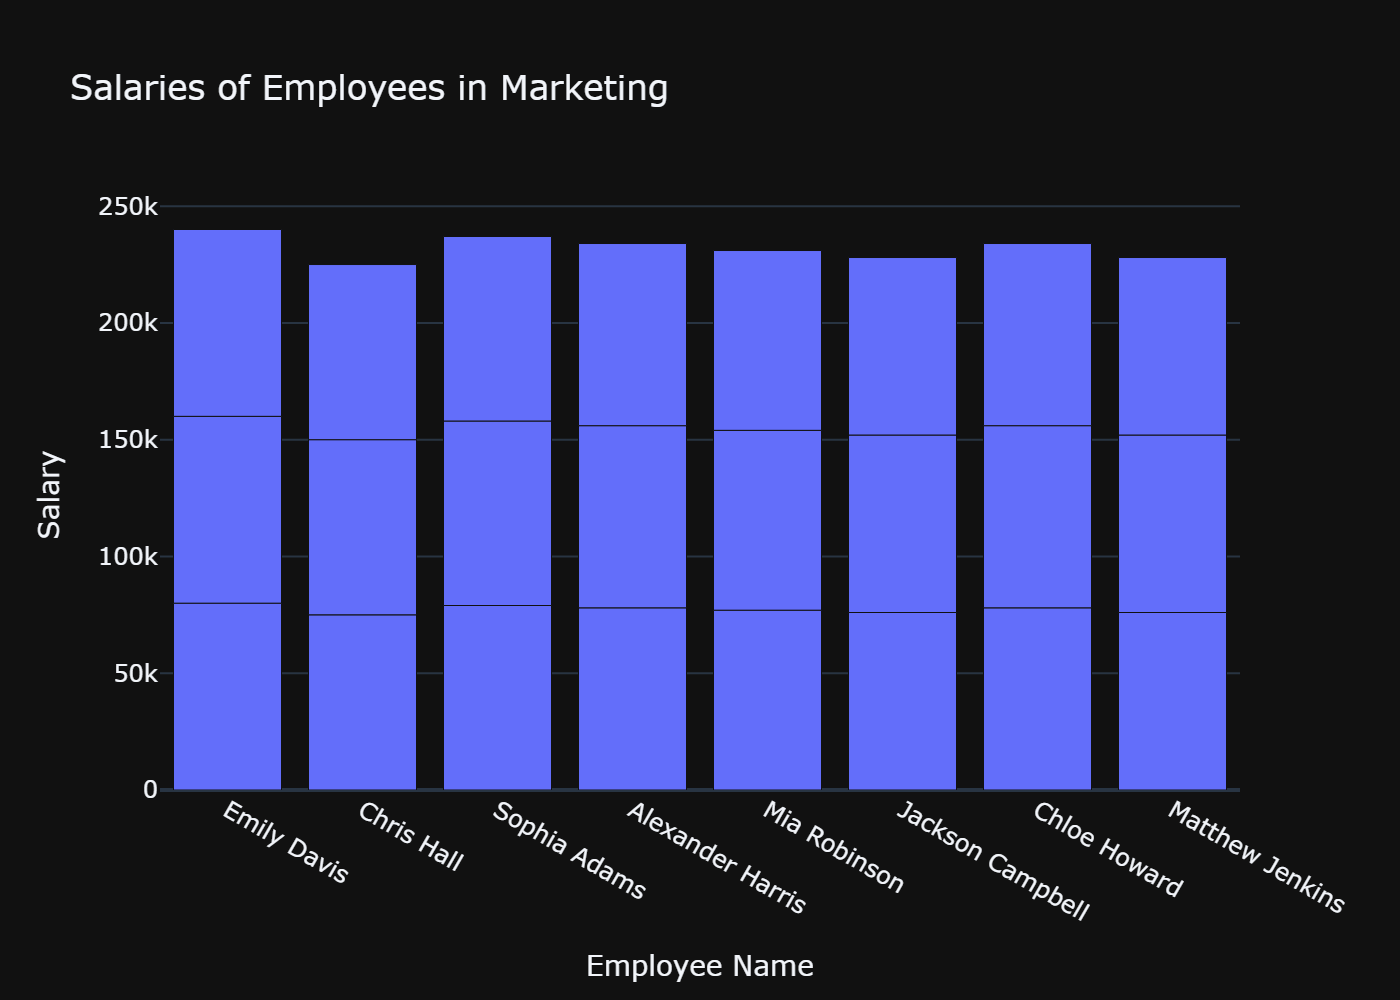

In [12]:
result = vn.ask(question="Get all employees who work in the 'Marketing' department")

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE IF NOT EXISTS employees (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT,\n        department VARCHAR(100),\n        salary DECIMAL(10, 2)\n    )\n\n\n\

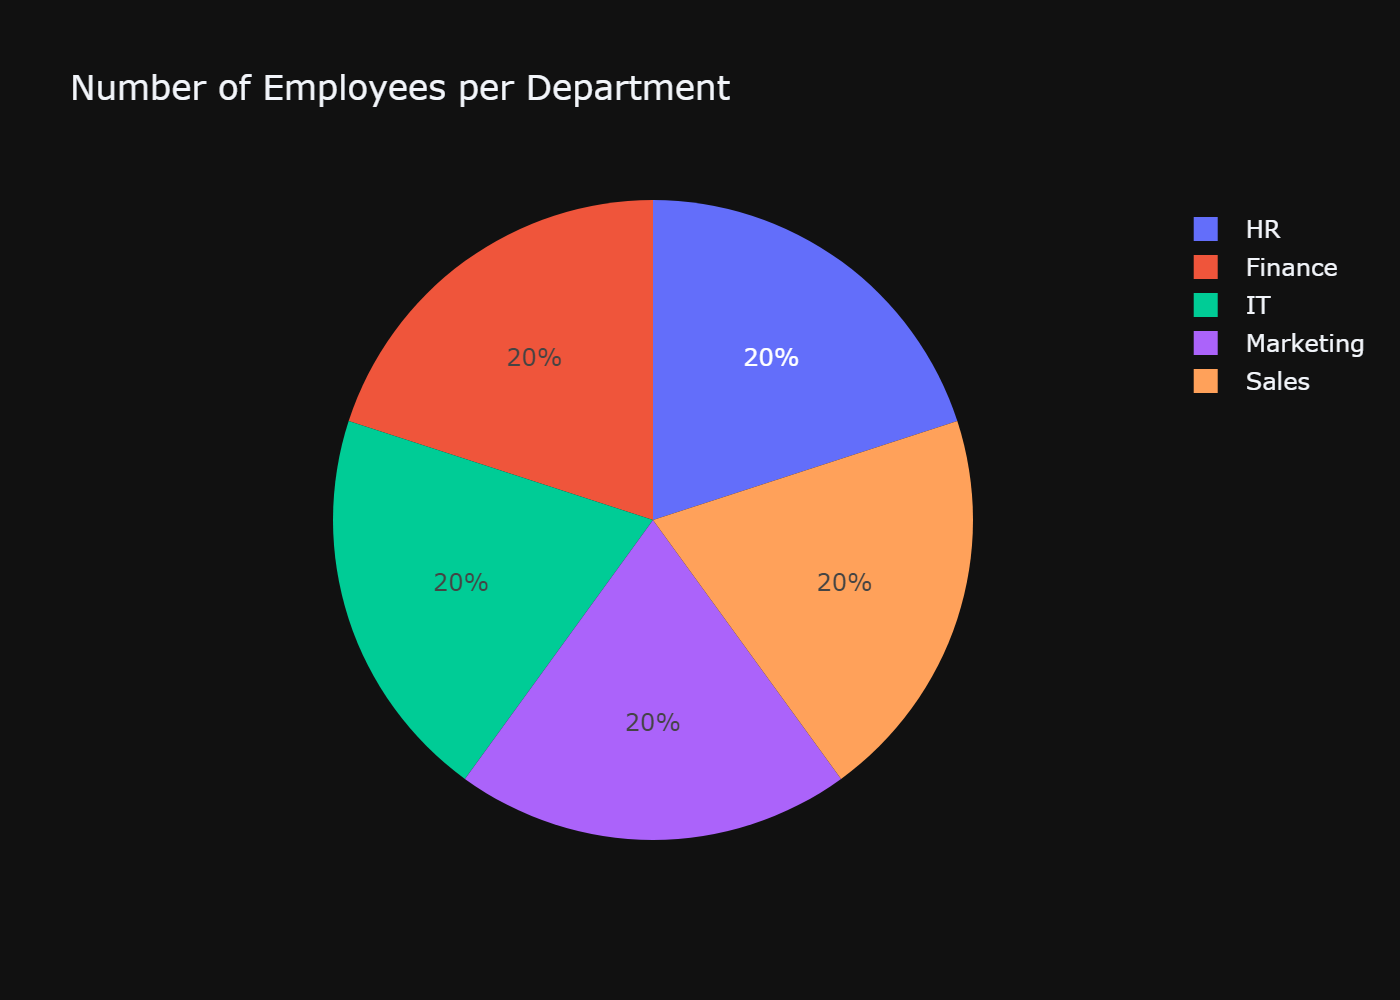

('SELECT department, COUNT(*) AS number_of_employees \nFROM employees \nGROUP BY department;',
   department  number_of_employees
 0         HR                   24
 1    Finance                   24
 2         IT                   24
 3  Marketing                   24
 4      Sales                   24,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'department=%{label}<br>number_of_employees=%{value}<extra></extra>',
               'labels': array(['HR', 'Finance', 'IT', 'Marketing', 'Sales'], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie',
               'values': {'bdata': 'GBgYGBg=', 'dtype': 'i1'}}],
     'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Number of Employees per Department'}}
 }))

In [13]:
vn.ask("Show a pie chart of the number of employees per department")


In [14]:
vn.enable_visualization = True


SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE employees (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(100) NOT NULL,\n    age INT NOT NULL,\n    department VARCHAR(50) NOT NULL,\n    salary DECIMAL(10,2) NOT NULL,\n    experience_years INT,\n    performance_rating DECIMAL(3,1)\n)\n\n\n\n    CREATE TABLE IF NOT EXISTS employees (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT,\n        department VARCHAR(100),\n        salary DECIMAL(10, 2)\n    )\n\n\n\

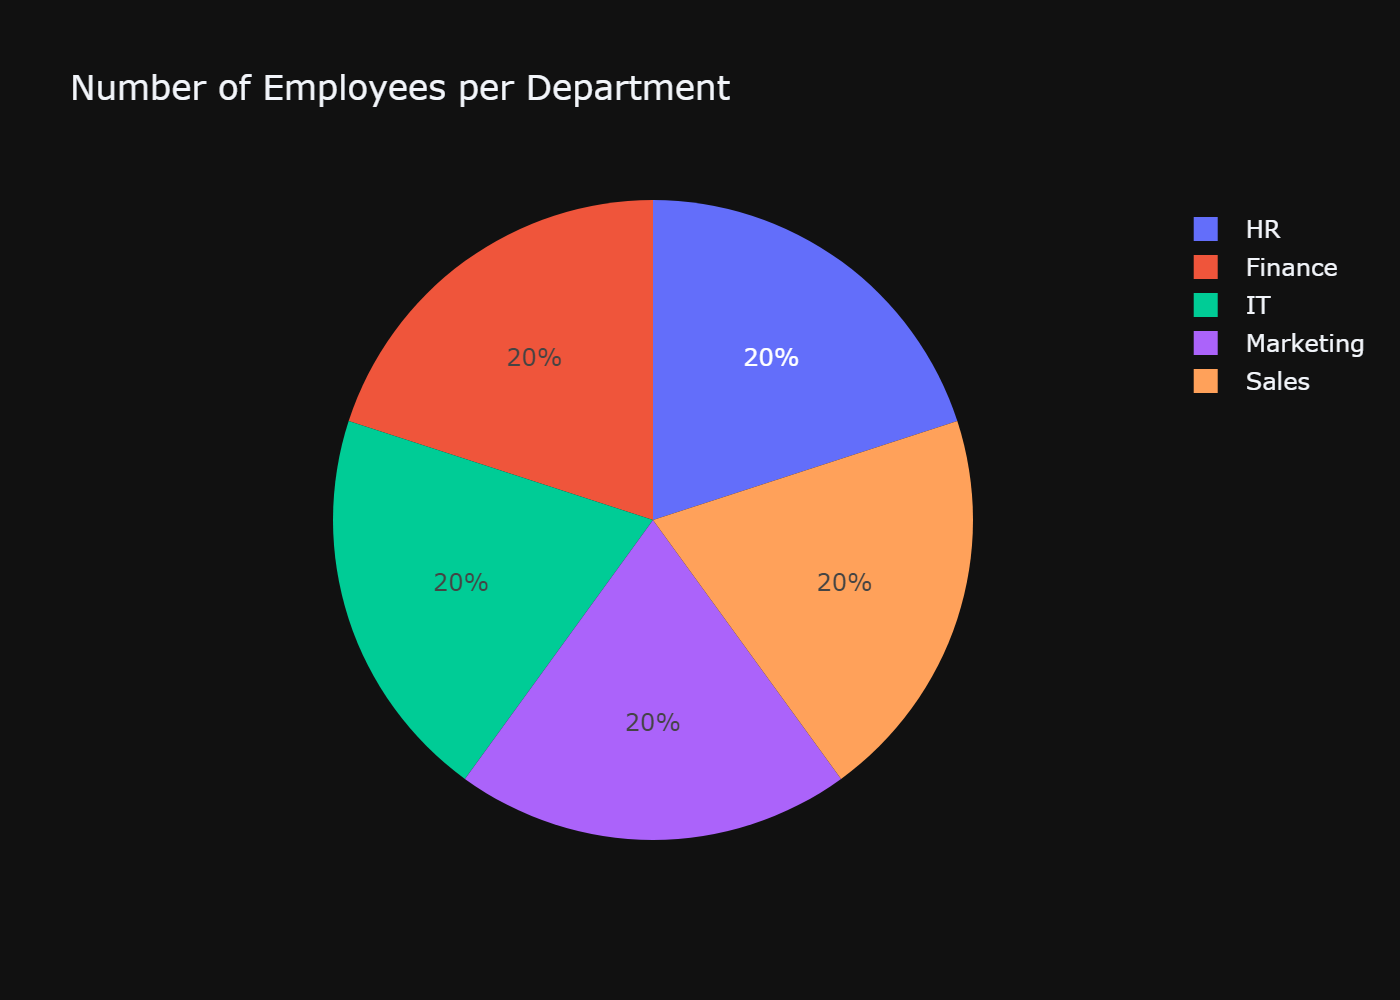

('SELECT department, COUNT(*) AS number_of_employees \nFROM employees \nGROUP BY department;',
   department  number_of_employees
 0         HR                   24
 1    Finance                   24
 2         IT                   24
 3  Marketing                   24
 4      Sales                   24,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'department=%{label}<br>number_of_employees=%{value}<extra></extra>',
               'labels': array(['HR', 'Finance', 'IT', 'Marketing', 'Sales'], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie',
               'values': {'bdata': 'GBgYGBg=', 'dtype': 'i1'}}],
     'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Number of Employees per Department'}}
 }))

In [15]:
vn.ask("Generate a pie chart showing the number of employees per department")


In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
